In [ ]:
# Import libraries 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
# Load the Pima Indians dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
feature_names = names[:8] 
data = pd.read_csv(url, names=names) 
#Splitting the data into dependent and independent variables 
X = data.drop("class", axis=1) 
y= data["class"]

# DT

In [ ]:
# Split the data into training and testing sets 
X1, X2, y1, y2 = train_test_split(X,y, random_state= 42, train_size=0.7) 
# The DT classifier 
DT = DecisionTreeClassifier() 
DT.fit(X1,y1).predict(X2) 
DT_Pred=DT.predict(X2) 
DT_results = accuracy_score(y2,DT_Pred) 
print(accuracy_score(y2,DT_Pred))

0.7316017316017316


# KNN

In [ ]:
# The KNN classifier 
KNN = KNeighborsClassifier() 
KNN.fit(X1,y1).predict(X2) 
KNN_Pred=KNN.predict(X2) 
KNN_results = accuracy_score(y2,KNN_Pred) 
print(accuracy_score(y2,KNN_Pred))

0.6883116883116883


# MLP

In [ ]:
# The MLP classifier 
MLP = MLPClassifier(batch_size=32,max_iter=250) 
MLP.fit(X1,y1).predict(X2) 
MLP_Pred=MLP.predict(X2) 
MLP_results = accuracy_score(y2,MLP_Pred) 
print(accuracy_score(y2,MLP_Pred)) 

0.7142857142857143


# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC() 
svm.fit(X1, y1) 
SVM_results= svm.score(X2, y2) 
print(svm.score(X2, y2))

0.7359307359307359


We could see the the accuracy of SVM is better than the rest of classifiers

# Bagging with DT

In [ ]:
from sklearn.ensemble import BaggingClassifier
def Bagging(model,n):
  DBG = BaggingClassifier(estimator=model,max_samples=0.6, n_estimators=n, random_state=42) 
  DBG.fit(X1,y1).predict(X2) 
  DBG_Pred=DBG.predict(X2) 
  DBG_results = accuracy_score(y2,DBG_Pred) 
  return accuracy_score(y2,DBG_Pred),DBG_results, DBG


In [ ]:
DT = DecisionTreeClassifier()
print(Bagging(DT,3)[0])
print(Bagging(DT,7)[0])
print(Bagging(DT,10)[0])
print(Bagging(DT,15)[0])
print(Bagging(DT,20)[0])

0.7142857142857143
0.7445887445887446
0.7575757575757576
0.7575757575757576
0.7402597402597403


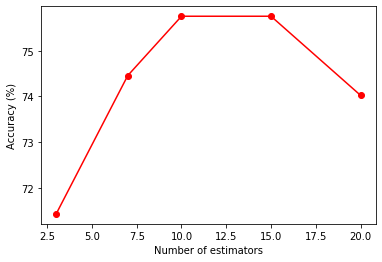

In [ ]:
#We plot the accuracy of the different bagging ensembles using three estimators 
models = ['DBG3','DBG7','DBG10','DBG15','DBG20'] 
n_estimators = [3,7,10,15,20] 
scores=[Bagging(DT,3)[1]*100,Bagging(DT,7)[1]*100, Bagging(DT,10)[1]*100, 
Bagging(DT,15)[1]*100,Bagging(DT,20)[1]*100] 
plt.plot(n_estimators, scores, 'ro-',) 
plt.xlabel("Number of estimators") 
plt.ylabel("Accuracy (%)") 
plt.show()

Le DT est un high variance model(on prend en considération toutes les données) du coup on remarque qu'il y a une meilleure accuracy quand on augmente le nombre de bags mais quand on dépasse le rang de 15, on ramarque que l'accuracy diminue puisque la variabilité n'est plus importante.

# Bagging with KNN


In [ ]:
KNN = KNeighborsClassifier()
print(Bagging(KNN,3)[0])
print(Bagging(KNN,7)[0])
print(Bagging(KNN,10)[0])
print(Bagging(KNN,15)[0])
print(Bagging(KNN,20)[0])

0.6926406926406926
0.7359307359307359
0.6926406926406926
0.6926406926406926
0.7056277056277056


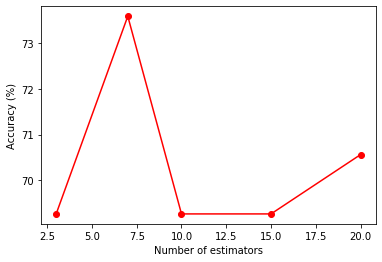

In [ ]:
#We plot the accuracy of the different bagging ensembles using three estimators 
models = ['KBG3','KBG7','KBG10','KBG15','KBG20'] 
n_estimators = [3,7,10,15,20] 
scores=[Bagging(KNN,3)[1]*100,Bagging(KNN,7)[1]*100, Bagging(KNN,10)[1]*100, 
Bagging(KNN,15)[1]*100,Bagging(KNN,20)[1]*100]  
plt.plot(n_estimators, scores, 'ro-',) 
plt.xlabel("Number of estimators") 
plt.ylabel("Accuracy (%)") 
plt.show() 

Puisque le KNN est un low variance and high bias model, on remarque que l'accuracy est meilleure quand le nombre de baggs est égal à 7.
Bagging is rarely used in conjunction with k-nn classifiers, as the decision surfaces are typically too stable and any multiples of datapoints in the bootstrap sample do not shift the 'weight' like in many other models.

Bagging KNN can help reduce the bias by averaging the predictions of multiple KNN models, but it may not be as effective as bagging decision trees because the models are still relatively similar to each other.


In [ ]:
MLP = MLPClassifier(batch_size=32,max_iter=250)
print(Bagging(MLP,3)[0])
print(Bagging(MLP,7)[0])
print(Bagging(MLP,10)[0])
print(Bagging(MLP,15)[0])
print(Bagging(MLP,20)[0])

0.696969696969697
0.7056277056277056
0.7056277056277056
0.70995670995671
0.70995670995671


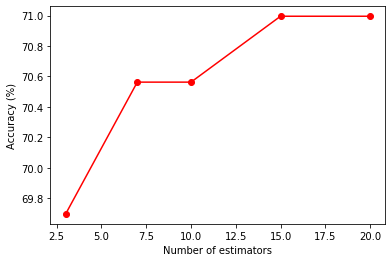

In [ ]:
#We plot the accuracy of the different bagging ensembles using three estimators 
models = ['MBG3','MBG7','MBG10','MBG15','MBG20'] 
n_estimators = [3,7,10,15,20] 
scores=[Bagging(MLP,3)[1]*100,Bagging(MLP,7)[1]*100, Bagging(MLP,10)[1]*100, 
Bagging(MLP,15)[1]*100,Bagging(MLP,20)[1]*100] 
plt.plot(n_estimators, scores, 'ro-',) 
plt.xlabel("Number of estimators") 
plt.ylabel("Accuracy (%)") 
plt.show() 

Like decision trees, MLP models have high variance, which means that they are prone to overfitting. Bagging MLP models can help reduce this overfitting by training multiple MLP models on different subsets of the training data and then combining their predictions. This can result in a more stable and accurate model that generalizes well to new data.

However, bagging MLP models can be computationally expensive, especially if the MLP models are large and complex. Also, MLP models can have a large number of hyperparameters that need to be tuned, which can make the training process more challenging.



In [ ]:
SVM = SVC() 
print(Bagging(SVM,3)[0])
print(Bagging(SVM,7)[0])
print(Bagging(SVM,10)[0])
print(Bagging(SVM,15)[0])
print(Bagging(SVM,20)[0])

0.7532467532467533
0.7445887445887446
0.7402597402597403
0.7402597402597403
0.7359307359307359


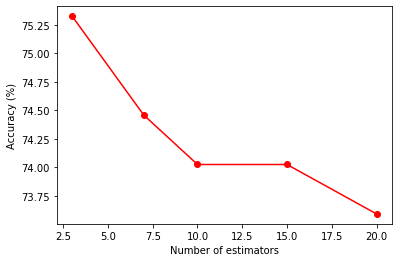

In [ ]:
#We plot the accuracy of the different bagging ensembles using three estimators 
models = ['MBG3','MBG7','MBG10','MBG15','MBG20'] 
n_estimators = [3,7,10,15,20] 
scores=[Bagging(SVM,3)[1]*100,Bagging(SVM,7)[1]*100, Bagging(SVM,10)[1]*100, 
Bagging(SVM,15)[1]*100,Bagging(SVM,20)[1]*100] 
plt.plot(n_estimators, scores, 'ro-',) 
plt.xlabel("Number of estimators") 
plt.ylabel("Accuracy (%)") 
plt.show() 

Puisque SVM est un low variance model on remarque que le bagging ne donne pas un bon résultat

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

Text(0, 0.5, 'Accuracy (%)')

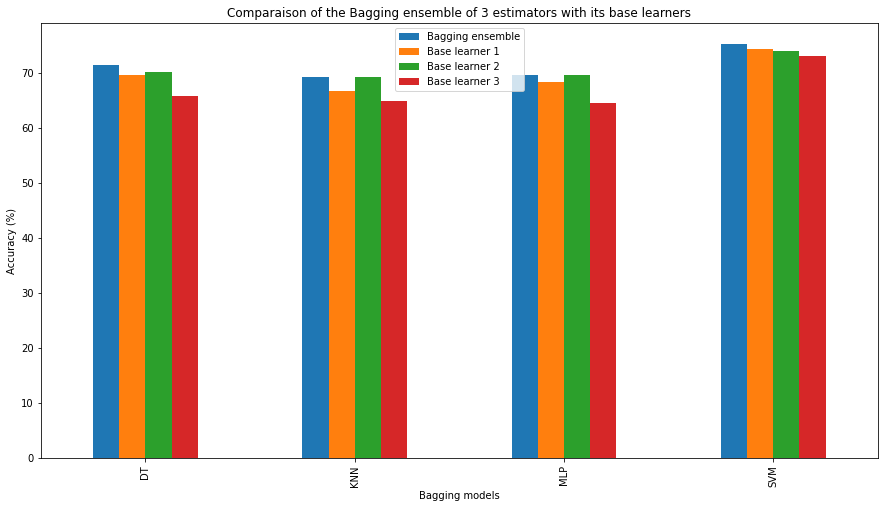

In [ ]:
r1_dt=accuracy_score(y2,Bagging(DT,3)[2].estimators_[0].predict(X2)) 
r2_dt=accuracy_score(y2,Bagging(DT,3)[2].estimators_[1].predict(X2)) 
r3_dt=accuracy_score(y2,Bagging(DT,3)[2].estimators_[2].predict(X2)) 
r1_knn=accuracy_score(y2,Bagging(KNN,3)[2].estimators_[0].predict(X2)) 
r2_knn=accuracy_score(y2,Bagging(KNN,3)[2].estimators_[1].predict(X2)) 
r3_knn=accuracy_score(y2,Bagging(KNN,3)[2].estimators_[2].predict(X2)) 
r1_mlp=accuracy_score(y2,Bagging(MLP,3)[2].estimators_[0].predict(X2)) 
r2_mlp=accuracy_score(y2,Bagging(MLP,3)[2].estimators_[1].predict(X2)) 
r3_mlp=accuracy_score(y2,Bagging(MLP,3)[2].estimators_[2].predict(X2)) 
r1_SVM=accuracy_score(y2,Bagging(SVM,3)[2].estimators_[0].predict(X2)) 
r2_SVM=accuracy_score(y2,Bagging(SVM,3)[2].estimators_[1].predict(X2)) 
r3_SVM=accuracy_score(y2,Bagging(SVM,3)[2].estimators_[2].predict(X2))
plotdata = pd.DataFrame({ 
 "Bagging ensemble":[Bagging(DT,3)[1]*100,Bagging(KNN,3)[1]*100,Bagging(MLP,3)[1]*100,Bagging(SVM,3)[1]*100], 
 "Base learner 1":[r1_dt*100,r1_knn*100,r1_mlp*100,r1_SVM*100], 
 "Base learner 2":[r2_dt*100,r2_knn*100,r2_mlp*100,r2_SVM*100], 
 "Base learner 3":[r3_dt*100,r3_knn*100,r3_mlp*100,r3_SVM*100]}, 
 index=["DT", "KNN", "MLP","SVM"] 
 ) 
plotdata.plot(kind="bar",figsize=(15, 8)) 
plt.title("Comparaison of the Bagging ensemble of 3 estimators with its base learners") 
plt.xlabel("Bagging models") 
plt.ylabel("Accuracy (%)") 


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featu

Text(0, 0.5, 'Accuracy (%)')

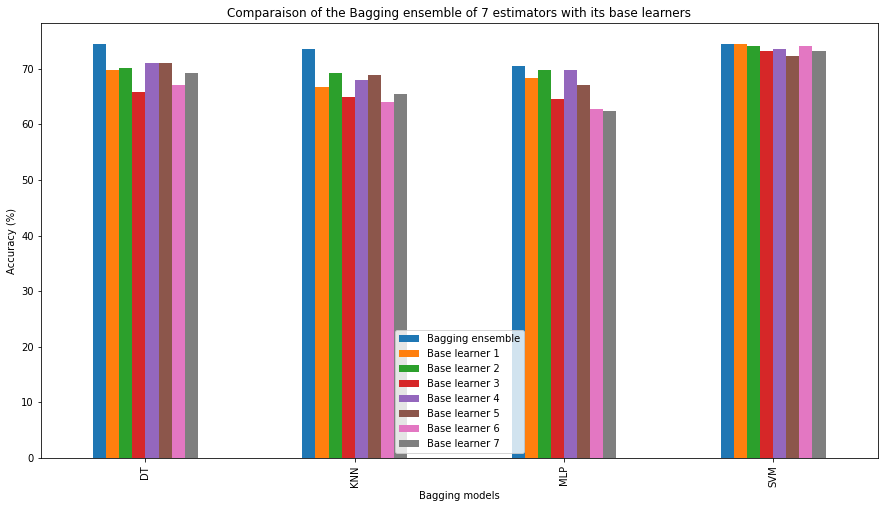

In [ ]:
r1_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[0].predict(X2)) 
r2_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[1].predict(X2)) 
r3_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[2].predict(X2)) 
r4_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[3].predict(X2)) 
r5_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[4].predict(X2)) 
r6_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[5].predict(X2)) 
r7_dt=accuracy_score(y2,Bagging(DT,7)[2].estimators_[6].predict(X2)) 


r1_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[0].predict(X2)) 
r2_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[1].predict(X2)) 
r3_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[2].predict(X2)) 
r4_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[3].predict(X2)) 
r5_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[4].predict(X2)) 
r6_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[5].predict(X2)) 
r7_knn=accuracy_score(y2,Bagging(KNN,7)[2].estimators_[6].predict(X2)) 

r1_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[0].predict(X2)) 
r2_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[1].predict(X2)) 
r3_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[2].predict(X2)) 
r4_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[3].predict(X2)) 
r5_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[4].predict(X2)) 
r6_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[5].predict(X2)) 
r7_mlp=accuracy_score(y2,Bagging(MLP,7)[2].estimators_[6].predict(X2))

r1_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[0].predict(X2)) 
r2_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[1].predict(X2)) 
r3_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[2].predict(X2))
r4_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[3].predict(X2)) 
r5_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[4].predict(X2)) 
r6_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[5].predict(X2)) 
r7_SVM=accuracy_score(y2,Bagging(SVM,7)[2].estimators_[6].predict(X2))

plotdata = pd.DataFrame({ 
 "Bagging ensemble":[Bagging(DT,7)[1]*100,Bagging(KNN,7)[1]*100,Bagging(MLP,7)[1]*100,Bagging(SVM,7)[1]*100], 
 "Base learner 1":[r1_dt*100,r1_knn*100,r1_mlp*100,r1_SVM*100], 
 "Base learner 2":[r2_dt*100,r2_knn*100,r2_mlp*100,r2_SVM*100], 
 "Base learner 3":[r3_dt*100,r3_knn*100,r3_mlp*100,r3_SVM*100],
 "Base learner 4":[r4_dt*100,r4_knn*100,r4_mlp*100,r4_SVM*100], 
 "Base learner 5":[r5_dt*100,r5_knn*100,r5_mlp*100,r5_SVM*100], 
 "Base learner 6":[r6_dt*100,r6_knn*100,r6_mlp*100,r6_SVM*100],
 "Base learner 7":[r7_dt*100,r7_knn*100,r7_mlp*100,r7_SVM*100]}, 
 index=["DT", "KNN", "MLP","SVM"] 
 ) 
plotdata.plot(kind="bar",figsize=(15, 8)) 
plt.title("Comparaison of the Bagging ensemble of 7 estimators with its base learners") 
plt.xlabel("Bagging models") 
plt.ylabel("Accuracy (%)") 


Text(0, 0.5, 'Accuracy (%)')

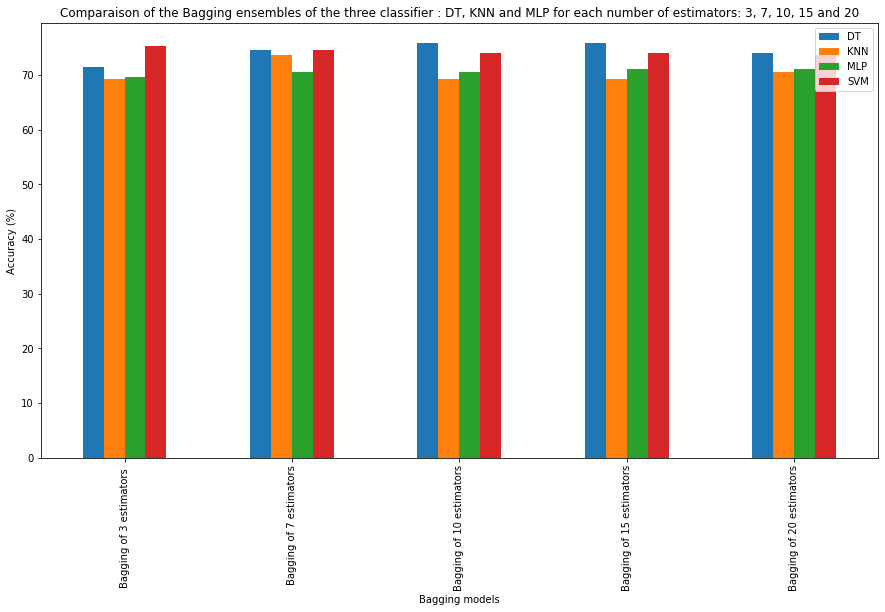

In [ ]:
plotdata = pd.DataFrame({ 
 "DT":[Bagging(DT,3)[1]*100,Bagging(DT,7)[1]*100,Bagging(DT,10)[1]*100,Bagging(DT,15)[1]*100, Bagging(DT,20)[1]*100],
 "KNN":[Bagging(KNN,3)[1]*100,Bagging(KNN,7)[1]*100,Bagging(KNN,10)[1]*100,Bagging(KNN,15)[1]*100, Bagging(KNN,20)[1]*100], 
 "MLP":[Bagging(MLP,3)[1]*100,Bagging(MLP,7)[1]*100,Bagging(MLP,10)[1]*100,Bagging(MLP,15)[1]*100,Bagging(MLP,20)[1]*100],
 "SVM":[Bagging(SVM,3)[1]*100,Bagging(SVM,7)[1]*100,Bagging(SVM,10)[1]*100,Bagging(SVM,15)[1]*100,Bagging(SVM,20)[1]*100]}, 
 index=["Bagging of 3 estimators ", "Bagging of 7 estimators","Bagging of 10 estimators", "Bagging of 15 estimators", "Bagging of 20 estimators"]) 
plotdata.plot(kind="bar",figsize=(15, 8)) 
plt.title("Comparaison of the Bagging ensembles of the three classifier : DT, KNN and MLP for each number of estimators: 3, 7, 10, 15 and 20") 
plt.xlabel("Bagging models") 
plt.ylabel("Accuracy (%)") 


Text(0, 0.5, 'Accuracy (%)')

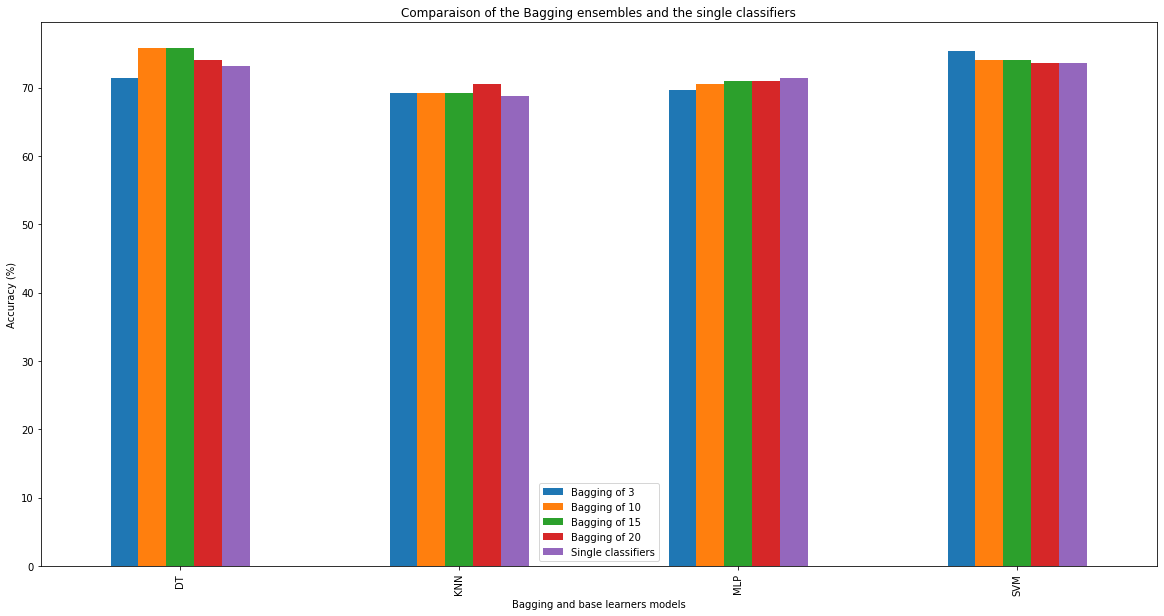

In [ ]:
plotdata = pd.DataFrame({ 
 "Bagging of 3":[Bagging(DT,3)[1]*100,Bagging(KNN,3)[1]*100,Bagging(MLP,3)[1]*100,Bagging(SVM,3)[1]*100], 
 "Bagging of 10":[Bagging(DT,10)[1]*100,Bagging(KNN,10)[1]*100,Bagging(MLP,10)[1]*100,Bagging(SVM,10)[1]*100], 
 "Bagging of 15":[Bagging(DT,15)[1]*100,Bagging(KNN,15)[1]*100,Bagging(MLP,15)[1]*100,Bagging(SVM,15)[1]*100], 
 "Bagging of 20":[Bagging(DT,20)[1]*100,Bagging(KNN,20)[1]*100,Bagging(MLP,20)[1]*100,Bagging(SVM,20)[1]*100], 
 "Single classifiers":[DT_results*100,KNN_results*100,MLP_results*100,SVM_results*100]}, 
 index=["DT", "KNN", "MLP","SVM"]) 
plotdata.plot(kind="bar",figsize=(20, 10)) 
plt.title("Comparaison of the Bagging ensembles and the single classifiers") 
plt.xlabel("Bagging and base learners models") 
plt.ylabel("Accuracy (%)") 